In [4]:
from google.colab import files
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [5]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv')
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [7]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')


In [8]:
df = df.dropna(subset=['date_added'])


In [10]:
df.dtypes


,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [12]:
df['date_added'] = df['date_added'].str.strip()

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [13]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


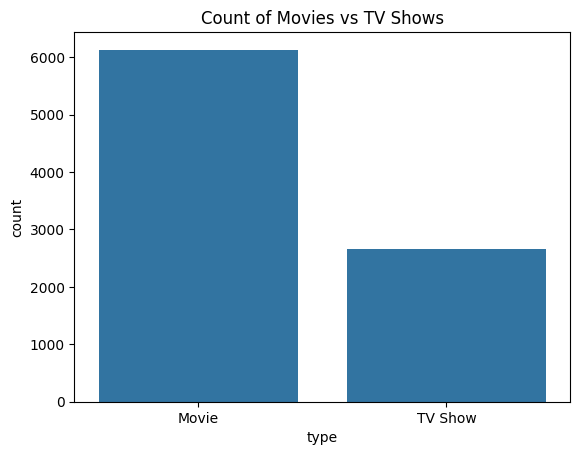

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='type')
plt.title('Count of Movies vs TV Shows')
plt.show()


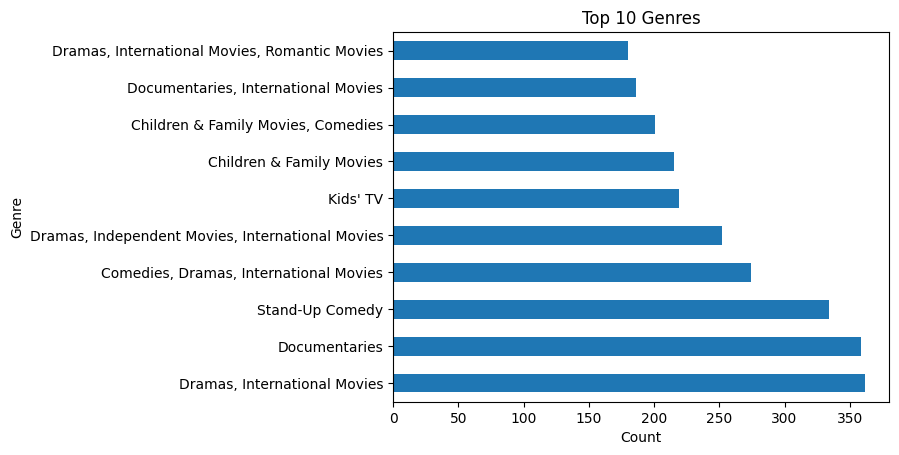

In [16]:
df['listed_in'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


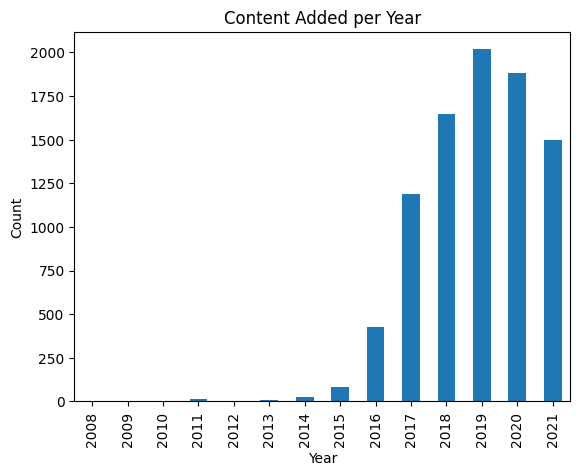

In [17]:
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title('Content Added per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


In [19]:
df['duration'].head()
df[['duration_int', 'duration_type']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')


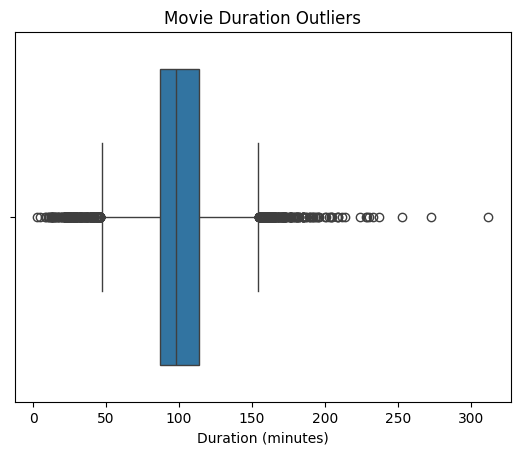

In [22]:
sns.boxplot(data=df[df['type'] == 'Movie'], x='duration_int')
plt.title('Movie Duration Outliers')
plt.xlabel('Duration (minutes)')
plt.show()


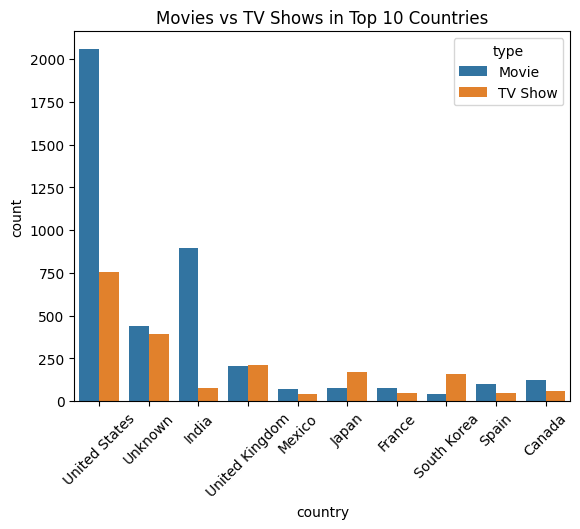

In [23]:
top_countries = df['country'].value_counts().head(10).index
sns.countplot(data=df[df['country'].isin(top_countries)], x='country', hue='type')
plt.title('Movies vs TV Shows in Top 10 Countries')
plt.xticks(rotation=45)
plt.show()


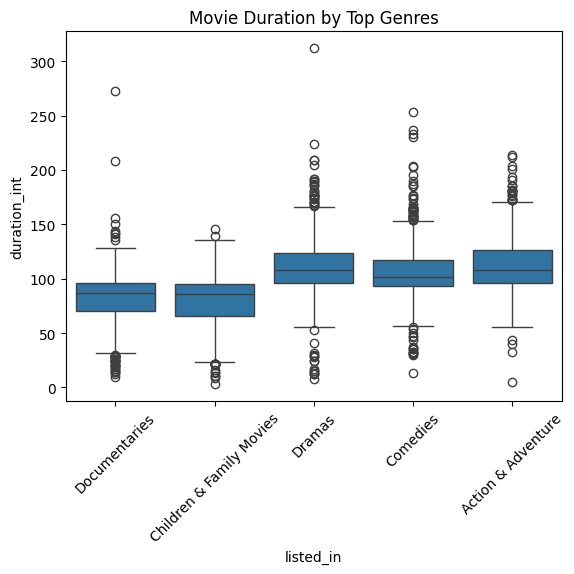

In [25]:

movie_df = df[(df['type'] == 'Movie') & (df['duration_int'].notna())]


movie_df = movie_df.copy()
movie_df['listed_in'] = movie_df['listed_in'].str.split(',').str[0]

top_genres = movie_df['listed_in'].value_counts().head(5).index

sns.boxplot(data=movie_df[movie_df['listed_in'].isin(top_genres)], x='listed_in', y='duration_int')
plt.title('Movie Duration by Top Genres')
plt.xticks(rotation=45)
plt.show()


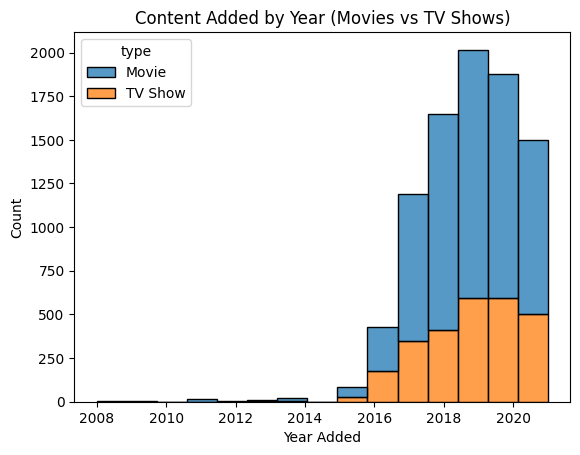

In [26]:
sns.histplot(data=df, x='year_added', hue='type', multiple='stack', bins=15)
plt.title('Content Added by Year (Movies vs TV Shows)')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()


In [27]:
df.select_dtypes(include='number').head()


,release_year,year_added,month_added,duration_int
0,2020,2021,9,90.0
1,2021,2021,9,2.0
2,2021,2021,9,1.0
3,2021,2021,9,1.0
4,2021,2021,9,2.0


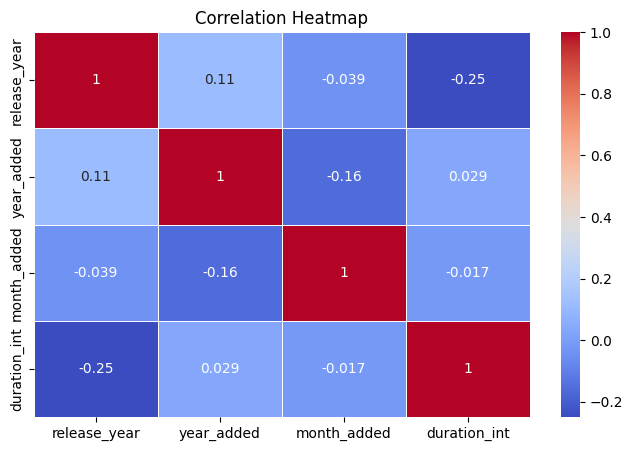

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
